<a href="https://colab.research.google.com/github/zainab9271/Outfit-Compatibility-Prediction/blob/main/04_Normal_Outfits_Compatibility_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip images

In [ ]:
!unzip /content/drive/MyDrive/Outfit_Recommendation_Project/polyvore_outfits_images.zip

# Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn import model_selection
import tqdm
import matplotlib.image as mpimg

What we are considering as a normal outfit:
*   Normal Outfits:

> 1. Tops
> 2. Bottoms
> 3. Shoes
> 4. Outerwear (optional)
> 5. Bags (optional)

<font color=orange>Tops, Bottoms, and Shoes Items are mandatory items for a normal outfit.</font>


# Blank Image to be added as Input(s) if the outfit does not have the optional items. 

In [ ]:
z = tf.zeros(shape=(224,224,3), dtype=tf.int64)
img = z.numpy()
tf.keras.utils.save_img('/content/drive/MyDrive/Outfit_Recommendation_Project/blank_image.jpg', img, 'channels_last')

In [ ]:
tf.random.set_seed(42)

# Compatibility Train Data

In [ ]:
train_comp_df = pd.read_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Normal_Outfits_Data/train_df.csv')
train_comp_df

,compatibility,outfit_sample
0,1,"['219393187_4','219393187_5','219393187_2','0'..."
1,1,"['224937990_3','224937990_4','224937990_2','0'..."
2,1,"['222637665_4','222637665_6','222637665_2','22..."
3,1,"['187821847_2','187821847_3','187821847_1','0'..."
4,1,"['125864349_4','125864349_6','125864349_2','0'..."
...,...,...
15899,0,"['194104831_3','205195957_4','39886761_2','0',..."
15900,0,"['215865914_1','155402372_3','219463192_2','0'..."
15901,0,"['205620140_2','171275333_5','224934969_2','0'..."
15902,0,"['85057420_4','206629909_3','132553628_1','0',..."


In [ ]:
train_comp_imgs_df = pd.read_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_train_outfits_images.csv')
train_comp_imgs_df

,outfits_images_id,outfits_images_path
0,199244701_1,/content/content/polyvore_outfits/images/13262...
1,199244701_2,/content/content/polyvore_outfits/images/15396...
2,199244701_3,/content/content/polyvore_outfits/images/17116...
3,199244701_4,/content/content/polyvore_outfits/images/16279...
4,199244701_5,/content/content/polyvore_outfits/images/17253...
...,...,...
85930,205613256_4,/content/content/polyvore_outfits/images/17596...
85931,205613256_5,/content/content/polyvore_outfits/images/16292...
85932,205613256_6,/content/content/polyvore_outfits/images/18060...
85933,225327855_1,/content/content/polyvore_outfits/images/18038...


In [ ]:
blank_item = {'outfits_images_id': '0', 'outfits_images_path': '/content/drive/MyDrive/Outfit_Recommendation_Project/blank_image.jpg'}

train_comp_imgs_df = train_comp_imgs_df.append(blank_item, ignore_index = True)

train_comp_imgs_df

,outfits_images_id,outfits_images_path
0,199244701_1,/content/content/polyvore_outfits/images/13262...
1,199244701_2,/content/content/polyvore_outfits/images/15396...
2,199244701_3,/content/content/polyvore_outfits/images/17116...
3,199244701_4,/content/content/polyvore_outfits/images/16279...
4,199244701_5,/content/content/polyvore_outfits/images/17253...
...,...,...
85931,205613256_5,/content/content/polyvore_outfits/images/16292...
85932,205613256_6,/content/content/polyvore_outfits/images/18060...
85933,225327855_1,/content/content/polyvore_outfits/images/18038...
85934,225327855_2,/content/content/polyvore_outfits/images/20191...


# Compatibility Test Data

In [ ]:
test_comp_df = pd.read_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Normal_Outfits_Data/test_df.csv')
test_comp_df

,compatibility,outfit_sample
0,1,"['222049137_3','222049137_6','222049137_1','0'..."
1,1,"['171638917_4','171638917_5','171638917_2','0'..."
2,1,"['209614451_3','209614451_5','209614451_2','0'..."
3,1,"['157135030_3','157135030_5','157135030_2','0'..."
4,1,"['163905816_7','163905816_10','163905816_2','0..."
...,...,...
13232,0,"['221942012_5','163248533_6','183162091_1','0'..."
13233,0,"['143700091_4','117379950_6','222301575_2','19..."
13234,0,"['202402701_4','218309462_3','183005681_2','0'..."
13235,0,"['154832568_2','214779274_4','163646445_2','0'..."


In [ ]:
test_comp_imgs_df = pd.read_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_test_outfits_images.csv')
test_comp_imgs_df

,outfits_images_id,outfits_images_path
0,222049137_1,/content/content/polyvore_outfits/images/15940...
1,222049137_2,/content/content/polyvore_outfits/images/20081...
2,222049137_3,/content/content/polyvore_outfits/images/20888...
3,222049137_4,/content/content/polyvore_outfits/images/20889...
4,222049137_5,/content/content/polyvore_outfits/images/17683...
...,...,...
74257,42911078_7,/content/content/polyvore_outfits/images/39806...
74258,210601169_1,/content/content/polyvore_outfits/images/18912...
74259,210601169_2,/content/content/polyvore_outfits/images/18912...
74260,210601169_3,/content/content/polyvore_outfits/images/18912...


In [ ]:
test_comp_imgs_df = test_comp_imgs_df.append(blank_item, ignore_index = True)

test_comp_imgs_df

,outfits_images_id,outfits_images_path
0,222049137_1,/content/content/polyvore_outfits/images/15940...
1,222049137_2,/content/content/polyvore_outfits/images/20081...
2,222049137_3,/content/content/polyvore_outfits/images/20888...
3,222049137_4,/content/content/polyvore_outfits/images/20889...
4,222049137_5,/content/content/polyvore_outfits/images/17683...
...,...,...
74258,210601169_1,/content/content/polyvore_outfits/images/18912...
74259,210601169_2,/content/content/polyvore_outfits/images/18912...
74260,210601169_3,/content/content/polyvore_outfits/images/18912...
74261,210601169_4,/content/content/polyvore_outfits/images/18912...


# Prepare dataframes for Siamese Network

In [ ]:
def parse_sample(outfit_sample):
    '''
    outfit_sample: STRING
    returns list of items id
    '''
    outfit_sample = re.sub('[\[\]\s\']', '', outfit_sample)
    outfit_items = np.array(outfit_sample.split(','))
    return outfit_items

In [ ]:
def parse_outfit(outfit_items, training = False ):
    '''
    outfit_items: list of outfit items
    returns list of outfit items path
    '''
    if training:
        outfit_imgs_path = np.array([train_comp_imgs_df.query(f'outfits_images_id in {[item]}').outfits_images_path.to_numpy()[0] for item in outfit_items])
        
    else:
        outfit_imgs_path = np.array([test_comp_imgs_df.query(f'outfits_images_id in {[item]}').outfits_images_path.to_numpy()[0] for item in outfit_items])

    return outfit_imgs_path
    

In [ ]:
train_df = pd.DataFrame(columns=['tops', 'bottoms', 'shoes', 'outerwear', 'bags', 'compatibility'])
test_df = pd.DataFrame(columns=['tops', 'bottoms', 'shoes', 'outerwear', 'bags', 'compatibility'])

In [ ]:
def make_dataframe(outfit_sample, compatibility, training = False):
    outfit_items = parse_sample(outfit_sample)
    items_imgs_path = parse_outfit(outfit_items, training )
    img_columns = ['tops','bottoms','shoes','outerwear','bags']
    row_dict = dict(zip(img_columns, list(items_imgs_path)))
    row_dict['compatibility'] = compatibility
    if training:
        global train_df
        train_df = pd.DataFrame.append(train_df, row_dict, ignore_index=True)
    else:
        global test_df
        test_df = pd.DataFrame.append(test_df, row_dict, ignore_index=True)



In [ ]:
for i in tqdm.tqdm(np.arange(train_comp_df.shape[0])):
    compatibility, outfit_sample = train_comp_df.iloc[i]
    make_dataframe(outfit_sample, compatibility, training=True)
train_df

100%|██████████| 15904/15904 [05:27<00:00, 48.58it/s]


,tops,bottoms,shoes,outerwear,bags,compatibility
0,/content/content/polyvore_outfits/images/20031...,/content/content/polyvore_outfits/images/20465...,/content/content/polyvore_outfits/images/15648...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/20013...,1
1,/content/content/polyvore_outfits/images/21385...,/content/content/polyvore_outfits/images/20745...,/content/content/polyvore_outfits/images/21283...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/21094...,1
2,/content/content/polyvore_outfits/images/20950...,/content/content/polyvore_outfits/images/20063...,/content/content/polyvore_outfits/images/16195...,/content/content/polyvore_outfits/images/18877...,/content/content/polyvore_outfits/images/13393...,1
3,/content/content/polyvore_outfits/images/14687...,/content/content/polyvore_outfits/images/15819...,/content/content/polyvore_outfits/images/11465...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,1
4,/content/content/polyvore_outfits/images/10527...,/content/content/polyvore_outfits/images/10909...,/content/content/polyvore_outfits/images/97417...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/11074...,1
...,...,...,...,...,...,...
15899,/content/content/polyvore_outfits/images/16294...,/content/content/polyvore_outfits/images/16602...,/content/content/polyvore_outfits/images/44544...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,0
15900,/content/content/polyvore_outfits/images/19367...,/content/content/polyvore_outfits/images/13312...,/content/content/polyvore_outfits/images/20252...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/20629...,0
15901,/content/content/polyvore_outfits/images/18108...,/content/content/polyvore_outfits/images/90190...,/content/content/polyvore_outfits/images/20464...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/20141...,0
15902,/content/content/polyvore_outfits/images/89063...,/content/content/polyvore_outfits/images/17721...,/content/content/polyvore_outfits/images/11542...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/59731...,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15904 entries, 0 to 15903
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tops           15904 non-null  object
 1   bottoms        15904 non-null  object
 2   shoes          15904 non-null  object
 3   outerwear      15904 non-null  object
 4   bags           15904 non-null  object
 5   compatibility  15904 non-null  object
dtypes: object(6)
memory usage: 745.6+ KB


In [ ]:
for i in tqdm.tqdm(np.arange(test_comp_df.shape[0])):
    compatibility, outfit_sample = test_comp_df.iloc[i]
    make_dataframe(outfit_sample, compatibility, training=False)
test_df

100%|██████████| 13237/13237 [04:08<00:00, 53.36it/s]


,tops,bottoms,shoes,outerwear,bags,compatibility
0,/content/content/polyvore_outfits/images/20888...,/content/content/polyvore_outfits/images/20382...,/content/content/polyvore_outfits/images/15940...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,1
1,/content/content/polyvore_outfits/images/14467...,/content/content/polyvore_outfits/images/14305...,/content/content/polyvore_outfits/images/14309...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/58893...,1
2,/content/content/polyvore_outfits/images/18531...,/content/content/polyvore_outfits/images/18454...,/content/content/polyvore_outfits/images/14507...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/14777...,1
3,/content/content/polyvore_outfits/images/13656...,/content/content/polyvore_outfits/images/13371...,/content/content/polyvore_outfits/images/11505...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/12703...,1
4,/content/content/polyvore_outfits/images/13702...,/content/content/polyvore_outfits/images/12817...,/content/content/polyvore_outfits/images/13482...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/13890...,1
...,...,...,...,...,...,...
13232,/content/content/polyvore_outfits/images/20301...,/content/content/polyvore_outfits/images/13968...,/content/content/polyvore_outfits/images/15050...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/65390...,0
13233,/content/content/polyvore_outfits/images/11334...,/content/content/polyvore_outfits/images/98133...,/content/content/polyvore_outfits/images/21066...,/content/content/polyvore_outfits/images/16789...,/content/drive/MyDrive/Outfit_Recommendation_P...,0
13234,/content/content/polyvore_outfits/images/16701...,/content/content/polyvore_outfits/images/20156...,/content/content/polyvore_outfits/images/16437...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/16555...,0
13235,/content/content/polyvore_outfits/images/10219...,/content/content/polyvore_outfits/images/18075...,/content/content/polyvore_outfits/images/13982...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13237 entries, 0 to 13236
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tops           13237 non-null  object
 1   bottoms        13237 non-null  object
 2   shoes          13237 non-null  object
 3   outerwear      13237 non-null  object
 4   bags           13237 non-null  object
 5   compatibility  13237 non-null  object
dtypes: object(6)
memory usage: 620.6+ KB


combine predefined train and test data to split them having more train samples and less test samples.

In [ ]:
full_df = pd.DataFrame.append(train_df, test_df, ignore_index=True)
full_df.compatibility = full_df.compatibility.astype('int64')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29141 entries, 0 to 29140
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tops           29141 non-null  object
 1   bottoms        29141 non-null  object
 2   shoes          29141 non-null  object
 3   outerwear      29141 non-null  object
 4   bags           29141 non-null  object
 5   compatibility  29141 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


## Split Train Test

In [ ]:
train, test = model_selection.train_test_split(full_df, 
                                               test_size=0.1, 
                                               random_state=42, 
                                               stratify=full_df.compatibility
                                               )

In [ ]:
train

,tops,bottoms,shoes,outerwear,bags,compatibility
4409,/content/content/polyvore_outfits/images/77746...,/content/content/polyvore_outfits/images/16917...,/content/content/polyvore_outfits/images/10063...,/content/content/polyvore_outfits/images/19033...,/content/drive/MyDrive/Outfit_Recommendation_P...,1
3272,/content/content/polyvore_outfits/images/21097...,/content/content/polyvore_outfits/images/20884...,/content/content/polyvore_outfits/images/19371...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/20375...,1
12576,/content/content/polyvore_outfits/images/20654...,/content/content/polyvore_outfits/images/20462...,/content/content/polyvore_outfits/images/20358...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/18238...,0
9171,/content/content/polyvore_outfits/images/19352...,/content/content/polyvore_outfits/images/17410...,/content/content/polyvore_outfits/images/20336...,/content/content/polyvore_outfits/images/16734...,/content/content/polyvore_outfits/images/20838...,0
5934,/content/content/polyvore_outfits/images/20669...,/content/content/polyvore_outfits/images/18588...,/content/content/polyvore_outfits/images/20438...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,1
...,...,...,...,...,...,...
40,/content/content/polyvore_outfits/images/95798...,/content/content/polyvore_outfits/images/11009...,/content/content/polyvore_outfits/images/11420...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/11190...,1
14804,/content/content/polyvore_outfits/images/19528...,/content/content/polyvore_outfits/images/92347...,/content/content/polyvore_outfits/images/17352...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,0
17063,/content/content/polyvore_outfits/images/15148...,/content/content/polyvore_outfits/images/15187...,/content/content/polyvore_outfits/images/13802...,/content/content/polyvore_outfits/images/19156...,/content/content/polyvore_outfits/images/14952...,1
12455,/content/content/polyvore_outfits/images/15092...,/content/content/polyvore_outfits/images/19346...,/content/content/polyvore_outfits/images/19634...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/20020...,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26226 entries, 4409 to 4079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tops           26226 non-null  object
 1   bottoms        26226 non-null  object
 2   shoes          26226 non-null  object
 3   outerwear      26226 non-null  object
 4   bags           26226 non-null  object
 5   compatibility  26226 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2885e3e90>]],
      dtype=object)

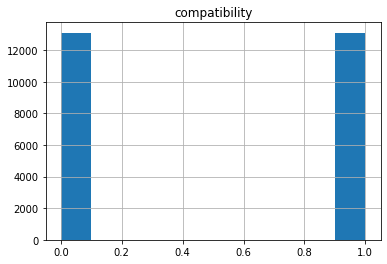

In [ ]:
train.hist()

In [ ]:
test

,tops,bottoms,shoes,outerwear,bags,compatibility
5786,/content/content/polyvore_outfits/images/20684...,/content/content/polyvore_outfits/images/21200...,/content/content/polyvore_outfits/images/20998...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/drive/MyDrive/Outfit_Recommendation_P...,1
13521,/content/content/polyvore_outfits/images/19402...,/content/content/polyvore_outfits/images/19103...,/content/content/polyvore_outfits/images/18830...,/content/content/polyvore_outfits/images/56965...,/content/content/polyvore_outfits/images/19739...,0
16495,/content/content/polyvore_outfits/images/16719...,/content/content/polyvore_outfits/images/16421...,/content/content/polyvore_outfits/images/13551...,/content/content/polyvore_outfits/images/16225...,/content/content/polyvore_outfits/images/16835...,1
20235,/content/content/polyvore_outfits/images/19584...,/content/content/polyvore_outfits/images/18452...,/content/content/polyvore_outfits/images/19741...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/18246...,1
5228,/content/content/polyvore_outfits/images/21272...,/content/content/polyvore_outfits/images/11569...,/content/content/polyvore_outfits/images/21210...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/20903...,1
...,...,...,...,...,...,...
25677,/content/content/polyvore_outfits/images/82700...,/content/content/polyvore_outfits/images/11190...,/content/content/polyvore_outfits/images/12712...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/10648...,0
27109,/content/content/polyvore_outfits/images/15715...,/content/content/polyvore_outfits/images/20431...,/content/content/polyvore_outfits/images/16529...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/16202...,0
18765,/content/content/polyvore_outfits/images/12751...,/content/content/polyvore_outfits/images/13476...,/content/content/polyvore_outfits/images/12171...,/content/drive/MyDrive/Outfit_Recommendation_P...,/content/content/polyvore_outfits/images/12232...,1
25825,/content/content/polyvore_outfits/images/20067...,/content/content/polyvore_outfits/images/18225...,/content/content/polyvore_outfits/images/18682...,/content/content/polyvore_outfits/images/15307...,/content/content/polyvore_outfits/images/21202...,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 5786 to 1843
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tops           2915 non-null   object
 1   bottoms        2915 non-null   object
 2   shoes          2915 non-null   object
 3   outerwear      2915 non-null   object
 4   bags           2915 non-null   object
 5   compatibility  2915 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 159.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2884c9e90>]],
      dtype=object)

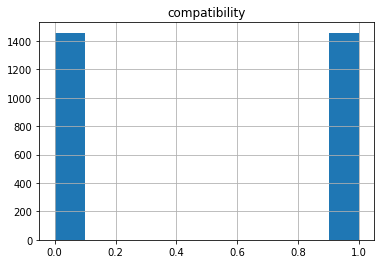

In [ ]:
test.hist()

# Save Siamese Model Data

In [ ]:
train.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Normal_Outfits_Data/train4siamese.csv', index=False)
test.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Normal_Outfits_Data/test4siamese.csv', index=False)

# Data Pipeline

In [ ]:
def read_image(x, y):
    img1, img2, img3, img4, img5 = x

    img1 = tf.io.read_file(img1)
    img1 = tf.image.decode_jpeg(img1, channels=3)
    img1 = tf.image.convert_image_dtype(img1, tf.float32)
    img1 = tf.image.resize(img1, [224, 224])
    img1 = tf.clip_by_value(img1, clip_value_min=0, clip_value_max=1)

    img2 = tf.io.read_file(img2)
    img2 = tf.image.decode_jpeg(img2, channels=3)
    img2 = tf.image.convert_image_dtype(img2, tf.float32)
    img2 = tf.image.resize(img2, [224, 224])
    img2 = tf.clip_by_value(img2, clip_value_min=0, clip_value_max=1)

    img3 = tf.io.read_file(img3)
    img3 = tf.image.decode_jpeg(img3, channels=3)
    img3 = tf.image.convert_image_dtype(img3, tf.float32)
    img3 = tf.image.resize(img3, [224, 224])
    img3 = tf.clip_by_value(img3, clip_value_min=0, clip_value_max=1)

    img4 = tf.io.read_file(img4)
    img4 = tf.image.decode_jpeg(img4, channels=3)
    img4 = tf.image.convert_image_dtype(img4, tf.float32)
    img4 = tf.image.resize(img4, [224, 224])
    img4 = tf.clip_by_value(img4, clip_value_min=0, clip_value_max=1)

    img5 = tf.io.read_file(img5)
    img5 = tf.image.decode_jpeg(img5, channels=3)
    img5 = tf.image.convert_image_dtype(img5, tf.float32)
    img5 = tf.image.resize(img5, [224, 224])
    img5 = tf.clip_by_value(img5, clip_value_min=0, clip_value_max=1)

    return (img1, img2, img3, img4, img5), y

In [ ]:
def augment_image(x, y):
    img1, img2, img3, img4, img5 = x

    img1 = tf.image.random_flip_left_right(img1)
    img1 = tf.image.random_brightness(img1, max_delta=32.0 / 255.0)
    img1 = tf.image.random_saturation(img1, lower=0.5, upper=1.5)
    img1 = tf.clip_by_value(img1, 0.0, 1.0)

    img2 = tf.image.random_flip_left_right(img2)
    img2 = tf.image.random_brightness(img2, max_delta=32.0 / 255.0)
    img2 = tf.image.random_saturation(img2, lower=0.5, upper=1.5)
    img2 = tf.clip_by_value(img2, 0.0, 1.0)

    img3 = tf.image.random_flip_left_right(img3)
    img3 = tf.image.random_brightness(img3, max_delta=32.0 / 255.0)
    img3 = tf.image.random_saturation(img3, lower=0.5, upper=1.5)
    img3 = tf.clip_by_value(img3, 0.0, 1.0)

    img4 = tf.image.random_flip_left_right(img4)
    img4 = tf.image.random_brightness(img4, max_delta=32.0 / 255.0)
    img4 = tf.image.random_saturation(img4, lower=0.5, upper=1.5)
    img4 = tf.clip_by_value(img4, 0.0, 1.0)

    img5 = tf.image.random_flip_left_right(img5)
    img5 = tf.image.random_brightness(img5, max_delta=32.0 / 255.0)
    img5 = tf.image.random_saturation(img5, lower=0.5, upper=1.5)
    img5 = tf.clip_by_value(img5, 0.0, 1.0)

    return (img1, img2, img3, img4, img5), y
    

In [ ]:
def dataset_creater(x1, x2, x3, x4, x5, y, training=False):
    data = tf.data.Dataset.from_tensor_slices(((x1, x2, x3, x4, x5), y))
    
    data = data.map(read_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    if training:
        data = data.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)

    data = data.shuffle(1028)
    data = data.batch(32, drop_remainder=True)
    data = data.prefetch(tf.data.AUTOTUNE)
    return data


train_dataset = dataset_creater(train.tops, train.bottoms, train.shoes, 
                                train.outerwear, train.bags, 
                                train.compatibility, training=True)

test_dataset = dataset_creater(test.tops, test.bottoms, test.shoes, 
                                test.outerwear, test.bags, test.compatibility)

# Show Oufit Samples

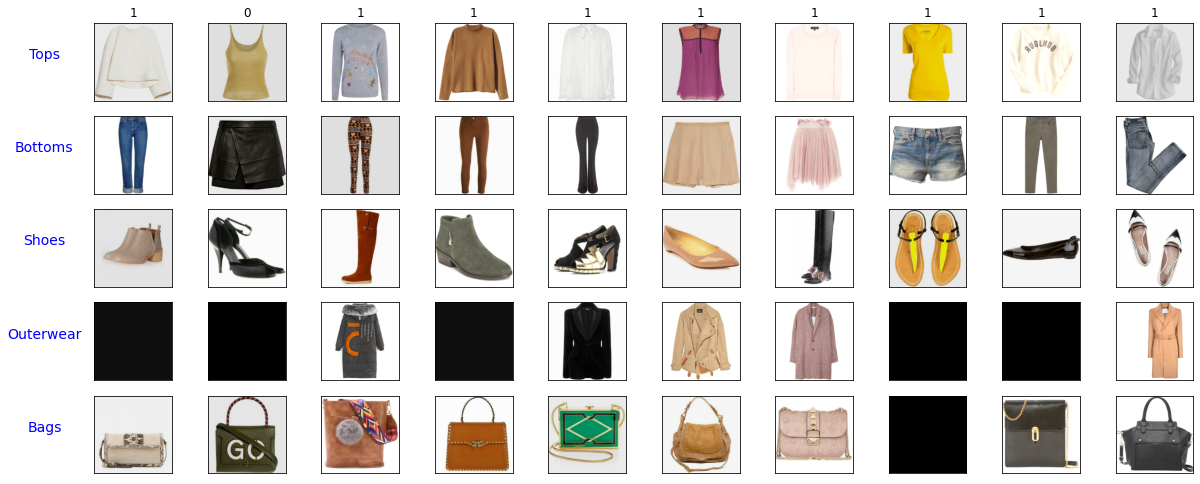

In [ ]:
n = 10
plt.figure(figsize=(20, 10))

for x, y in train_dataset.take(1):
    x1, x2, x3, x4, x5 = x

    for i in range(n):
        
        plt.subplot(6, n, i + 1)
        plt.title(f"{y[i]}")
        plt.imshow(tf.squeeze(x1[i]))
        plt.xticks([])  
        plt.yticks([])
        if i==0:
            plt.ylabel('Tops', labelpad=50, rotation=0, fontsize=14, color='b')
        
        plt.subplot(6, n, n + i + 1)
        plt.imshow(tf.squeeze(x2[i]))
        plt.xticks([])  
        plt.yticks([])
        if i==0:
            plt.ylabel('Bottoms', labelpad=50, rotation=0, fontsize=14, color='b')
        
        plt.subplot(6, n, 2*n + i + 1)
        plt.imshow(tf.squeeze(x3[i]))
        plt.xticks([])  
        plt.yticks([])
        if i==0:
            plt.ylabel('Shoes', labelpad=50, rotation=0, fontsize=14, color='b')
        
        plt.subplot(6, n, 3*n + i + 1)
        plt.imshow(tf.squeeze(x4[i]))
        plt.xticks([])  
        plt.yticks([])
        if i==0:
            plt.ylabel('Outerwear', labelpad=50, rotation=0, fontsize=14, color='b')
        
        plt.subplot(6, n, 4*n + i + 1)
        plt.imshow(tf.squeeze(x5[i]))
        plt.xticks([])  
        plt.yticks([])
        if i==0:
            plt.ylabel('Bags', labelpad=50, rotation=0, fontsize=14, color='b')


plt.show()

# Pretrained CNN Model

In [ ]:
cnn_model = tf.keras.applications.DenseNet121(include_top=False, input_shape=(224, 224, 3))
cnn_model.trainable = False
cnn_model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

#Create the Siamese Model


In [ ]:
tf.keras.backend.clear_session()
class SiameseModel(tf.keras.Model):
    def __init__(self, cnn_model):
        super(SiameseModel, self).__init__()

        self.cnn_model = cnn_model

        self.D1 = tf.keras.layers.Dense(512, use_bias=False)
        self.BN_1 = tf.keras.layers.BatchNormalization()
        self.D2 = tf.keras.layers.Dense(128, use_bias=False)
        self.BN_2 = tf.keras.layers.BatchNormalization()

        self.out = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

    def call(self, inputs):
        x1, x2, x3, x4, x5 = inputs

        x1 = self.cnn_model(x1)
        x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)

        x2 = self.cnn_model(x2)
        x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)

        x3 = self.cnn_model(x3)
        x3 = tf.keras.layers.GlobalAveragePooling2D()(x3)

        x4 = self.cnn_model(x4)
        x4 = tf.keras.layers.GlobalAveragePooling2D()(x4)

        x5 = self.cnn_model(x5)
        x5 = tf.keras.layers.GlobalAveragePooling2D()(x5)

        x = tf.keras.layers.concatenate([x1, x2, x3, x4, x5])

        x = self.D1(x)
        x = self.BN_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.D2(x)
        x = self.BN_2(x)
        x = tf.nn.leaky_relu(x)

        out = self.out(x)

        return out

    def build_model(self, dim=[224, 224, 3]):
        x = (tf.keras.layers.Input(dim, name='tops'), tf.keras.layers.Input(dim, name='bottoms'), 
             tf.keras.layers.Input(dim, name='shoes'), tf.keras.layers.Input(dim, name='outerwear'), 
             tf.keras.layers.Input(dim, name='bags'))
        return tf.keras.Model(inputs=[x], outputs=[self.call(x)])


model = SiameseModel(cnn_model=cnn_model)
model.build_model(dim=[224, 224, 3]).summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 tops (InputLayer)              [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 bottoms (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 shoes (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                            

In [ ]:
# build the model
x = (tf.keras.layers.Input([224, 224, 3], name='tops'), tf.keras.layers.Input([224, 224, 3], name='bottoms'), 
     tf.keras.layers.Input([224, 224, 3], name='shoes'), tf.keras.layers.Input([224, 224, 3], name='outerwear'), 
     tf.keras.layers.Input([224, 224, 3], name='bags'))
model(x)
model.summary()

Model: "siamese_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dense (Dense)               (None, 512)               2621440   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65536     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)               

##Plot the model 

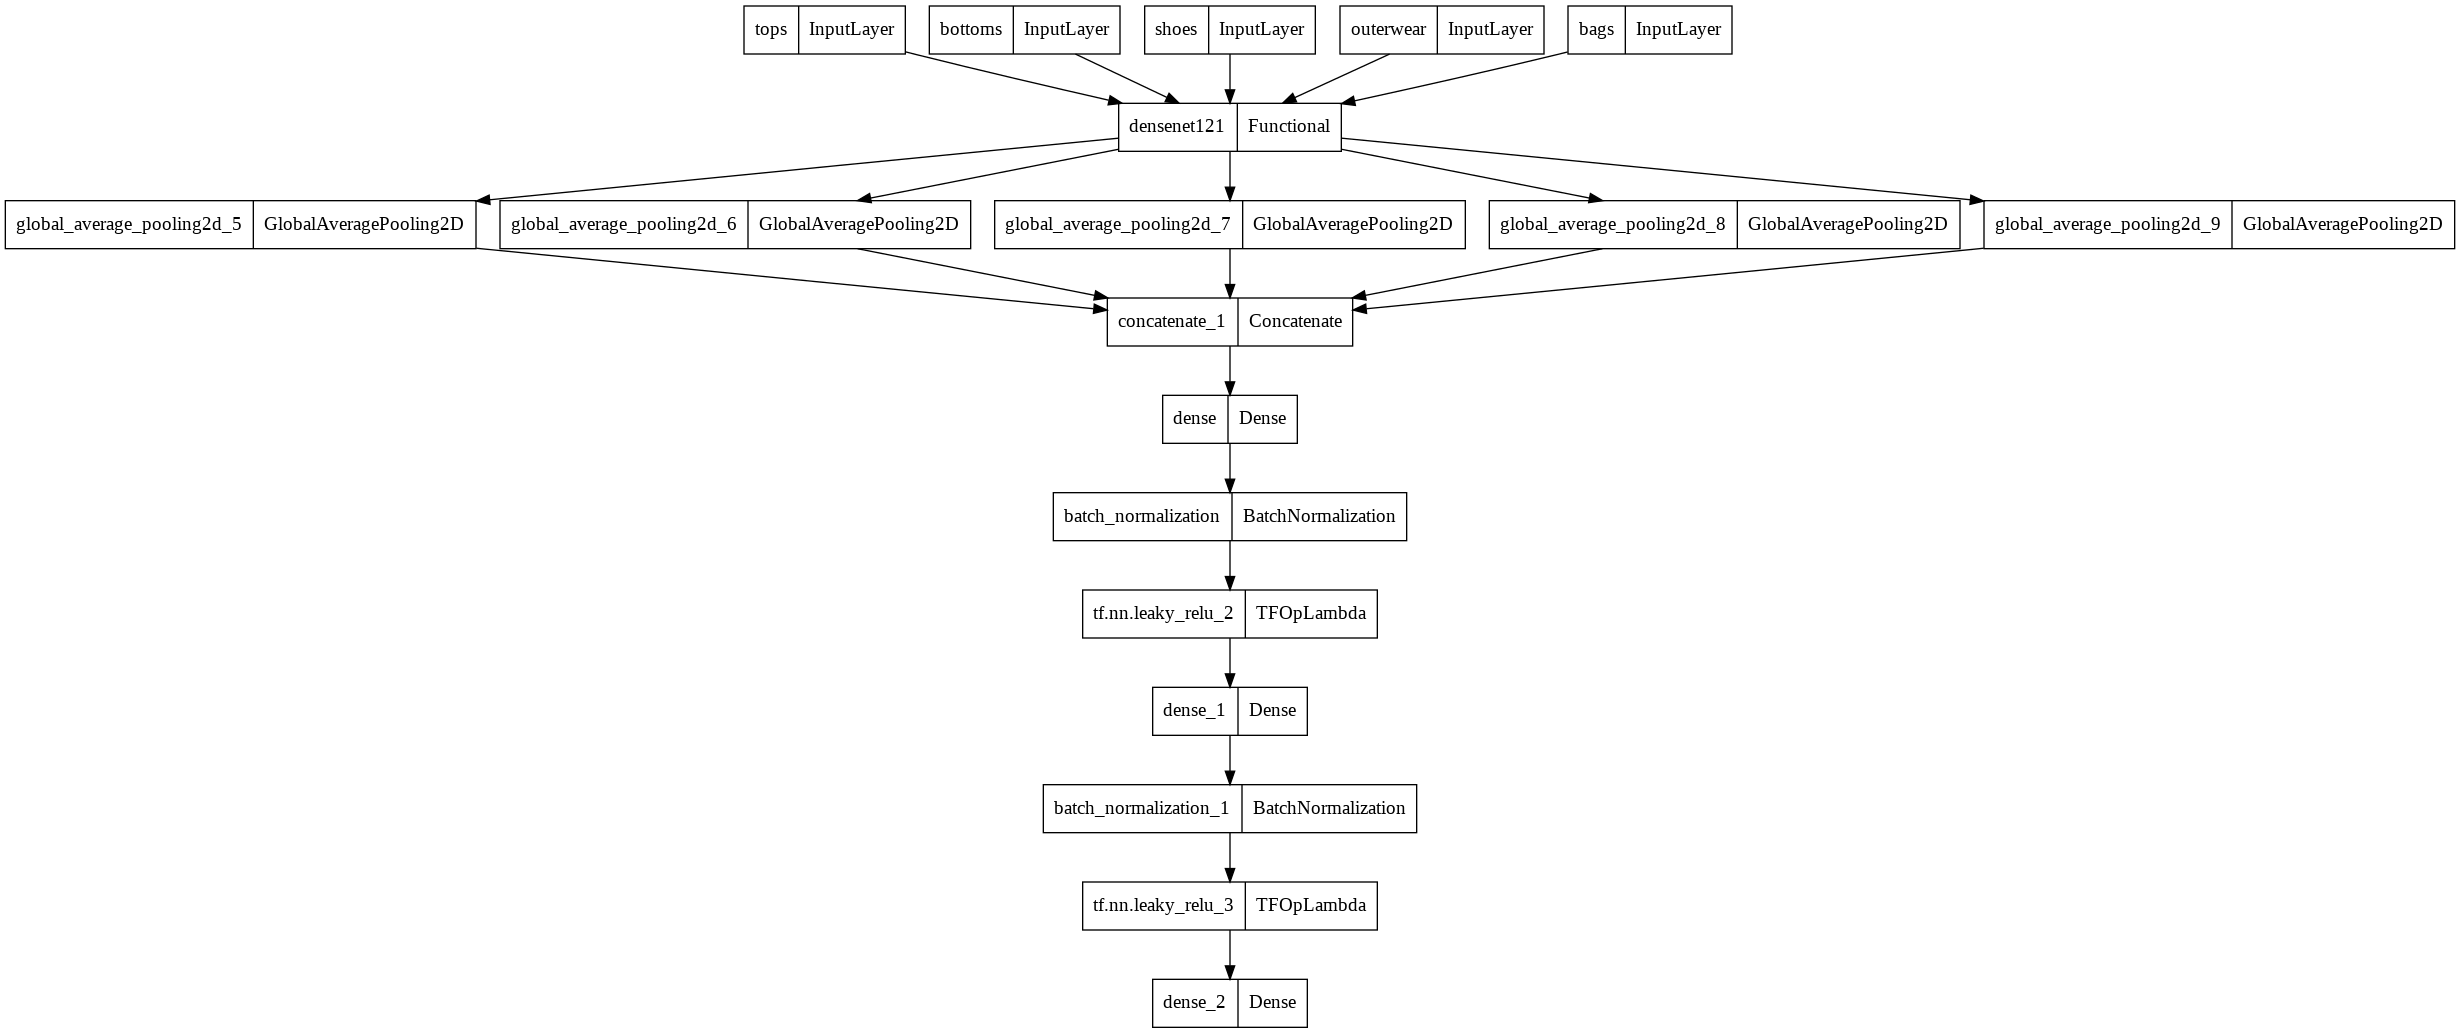

In [ ]:
tf.keras.utils.plot_model(model.build_model(dim=[224, 224, 3]))

#Define the Loss function and the optimizer

In [ ]:
loss_object = tf.losses.BinaryCrossentropy()
optimizer = tf.optimizers.Adam()

# Train the model 

In [ ]:
model.compile(optimizer=optimizer, loss=loss_object, metrics=["acc"])

In [ ]:
best_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Outfit_Recommendation_Project/best_model_4_normal_outfits',
                                                monitor='val_loss',
                                                save_best_only=True
                                                )
model.fit(train_dataset, epochs=3, validation_data=test_dataset, callbacks= [best_model])

Epoch 1/3
819/819 [==============================] - 357s 388ms/step - loss: 0.6929 - acc: 0.5579 - val_loss: 0.6805 - val_acc: 0.5718
Epoch 2/3
819/819 [==============================] - 266s 318ms/step - loss: 0.6371 - acc: 0.6347 - val_loss: 0.7042 - val_acc: 0.5838
Epoch 3/3
819/819 [==============================] - 267s 319ms/step - loss: 0.5882 - acc: 0.6848 - val_loss: 0.6971 - val_acc: 0.5962
